**Name : Aakifah Batool**

**The Sparks Foundation #GRIPDEC20**



**Task 1 : Prediction using Supervised ML**



**Problem Statement : Predict the percentage/score of an student based on the no. of study hours**

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Read Data**

In [25]:
data_url='http://bit.ly/w-data'
Student_data=pd.read_csv(data_url)
Student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Explore Data**

In [5]:
Student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
Student_data.shape

(25, 2)

In [7]:
Student_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
Student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
Student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
Student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Hours and Scores are highly correlated

**Check for missing values**

In [11]:
Student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No missing values

**Check for duplicate values**

In [12]:
Student_data[Student_data.duplicated()].count()

Hours     0
Scores    0
dtype: int64

No duplicate values

**Visualization of Data**

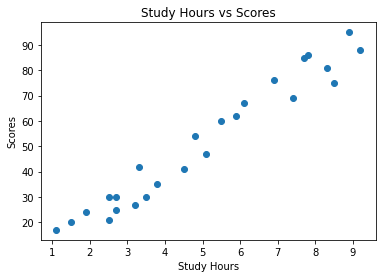

In [14]:
plt.scatter(Student_data['Hours'],Student_data['Scores'])
plt.title('Study Hours vs Scores')  
plt.xlabel('Study Hours')  
plt.ylabel('Scores')  
plt.show()

Hours and Scores vary linearly

**Split entire data into Training Data and Testing Data**

In [15]:
X=Student_data.iloc[:,0].values
Y=Student_data.iloc[:,1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

**LinearRegression() object creation**

In [16]:
linreg=LinearRegression()

**Fit Linear Regression model**

In [17]:
lin_model=linreg.fit(X_train,Y_train)

**Predict Scores**

In [18]:
pred_train=lin_model.predict(X_train)
pred_test=lin_model.predict(X_test)

**Linear Regression model coefficient and intercept**

In [19]:
lin_model.coef_

array([9.60171878])

In [20]:
lin_model.intercept_

2.695388922345728

**Best Fit line or Least Square line or Regression line**

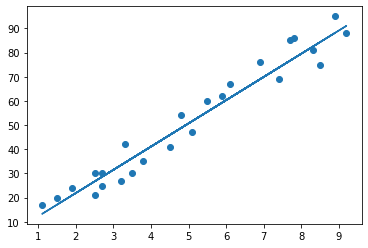

In [21]:
best_fit_line=X*lin_model.coef_ + lin_model.intercept_
plt.scatter(X,Y)
plt.plot(X,best_fit_line)

**Evaluation of model for training data**

In [22]:
print('Training Data:')
print('Mean Absolute Error:',mean_absolute_error(np.array(Y_train),pred_train))
print('Root Mean Squared Error:',sqrt(mean_squared_error(np.array(Y_train),pred_train)))
print('Coefficient of Determination(R^2 score):',r2_score(np.array(Y_train),pred_train))

Training Data:
Mean Absolute Error: 5.008825013427952
Root Mean Squared Error: 5.498673099003484
Coefficient of Determination(R^2 score): 0.9493255692526655


**Evaluation of model for testing data**

In [23]:
print('Testing Data:')
print('Mean Absolute Error:',mean_absolute_error(np.array(Y_test),pred_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(np.array(Y_test),pred_test)))
print('Coefficient of Determination(R^2 score):',r2_score(np.array(Y_test),pred_test))

Testing Data:
Mean Absolute Error: 4.976750923680405
Root Mean Squared Error: 5.155850704673393
Coefficient of Determination(R^2 score): 0.9605221627526418


**Predict score for 9.25 hours of study**

In [29]:
hours=9.25
print('No. of hours:',hours)
print('Predicted score:',linreg.predict(np.array(9.25).reshape(-1,1)))

No. of hours: 9.25
Predicted score: [91.51128762]
